In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

from dotenv import load_dotenv

from langchain_ollama import ChatOllama

llm =  ChatOllama(model="llama3.2", temperature=0.2)
from pprint import pprint

c:\Users\harsh.raj\OneDrive - Aster DM Healthcare\Codes\LangGraph\Practical LangGraph\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
## State defining
class PromptChaining(TypedDict):
    topic : str
    outline : str
    content : str

## defining functions for the nodes    
def generate_outline(state:PromptChaining)->PromptChaining:
    
    #get topic
    topic = state['topic']
    
    #create prompt
    prompt = f"Generate a detailed outline for a blog on the topic :{topic}"
    
    #call llm
    outline = llm.invoke(prompt).content
    
    #update state
    state['outline'] = outline

    return state
    
def generate_blog(state:PromptChaining)->PromptChaining:
    
    #get topic
    topic = state['topic']
    outline = state['outline']
    
    #create prompt
    prompt = f"Generate a detailed outline for a blog on the topic :{topic} using the following outline \n {outline}"
    
    #call llm
    content = llm.invoke(prompt).content
    
    #update state
    state['content'] = content

    return state
    

In [5]:
## graph creation
graph = StateGraph(PromptChaining)

## node creation
graph.add_node('generate_outline',generate_outline)
graph.add_node('generate_blog',generate_blog)

## edge creation
graph.add_edge(START,'generate_outline')
graph.add_edge('generate_outline','generate_blog')
graph.add_edge('generate_blog',END)

## compile workflow
workflow = graph.compile()

## exceute workflow
initial_state = {'topic': "multi-agent AI systems"}
final_state = workflow.invoke(initial_state)

##display the state
print("\n🟦 INPUT STATE")
pprint(initial_state)

print("\n🟩 FINAL STATE")
pprint(final_state)


🟦 INPUT STATE
{'topic': 'multi-agent AI systems'}

🟩 FINAL STATE
{'content': 'Here is a detailed outline for a blog on multi-agent AI systems:\n'
            '\n'
            '**Title:** "The Power of Multi-Agent AI Systems: Unlocking '
            'Collective Intelligence"\n'
            '\n'
            '**I. Introduction**\n'
            '\n'
            '* Brief overview of artificial intelligence (AI) and its '
            'applications\n'
            '\t+ Definition of AI and its various types (e.g., narrow, '
            'general, superintelligence)\n'
            '\t+ Examples of successful AI applications in industries such as '
            'healthcare, finance, and transportation\n'
            '* Explanation of multi-agent AI systems and their increasing '
            'importance in modern technology\n'
            '\t+ Definition of multi-agent AI systems and their '
            'characteristics (e.g., decentralized decision-making, autonomous '
            'agents)\n'
   

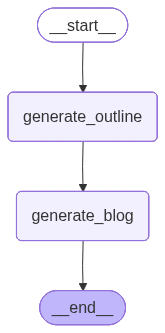

In [6]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())